# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 16, 2017, BEFORE the beginning of class at 6:00pm **

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Claire Danaher
    Erin Teeple
    Janvi Kathari
    Jonny Friedmann
    Renee Sweeny
  

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Anaconda)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code (depending on your distribution, you may need to download this directly from Gitub at https://github.com/scikit-learn/scikit-learn):
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [158]:
import os
import tarfile
from contextlib import closing
try:
    from urllib import urlopen
except ImportError:
    from urllib.request import urlopen


URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = "txt_sentoken"


if not os.path.exists(DATA_FOLDER):

    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())

    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path='.')
    os.remove(ARCHIVE_NAME)


In [159]:
"""Build a sentiment analysis / polarity model
Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.
In this examples we will use a movie review dataset.
"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics



# NOTE: we put the following in a 'if __name__ == "__main__"' protected
# block to be able to use a multi-core grid search that also works under
# Windows, see: http://docs.python.org/library/multiprocessing.html#windows
# The multiprocessing module is used as the backend of joblib.Parallel
# that is used when n_jobs != 1 in GridSearchCV

# the training data folder must be passed as first argument
movie_reviews_data_folder = sys.argv[1]
dataset = load_files('txt_sentoken', shuffle=False)
print("n_samples: %d" % len(dataset.data))

# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)


# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
    ('clf', LinearSVC(C=1000)),
])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

# TASK: print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# import matplotlib.pyplot as plt
# plt.matshow(cm)
# plt.show()

n_samples: 2000
0 params - {'vect__ngram_range': (1, 1)}; mean - 0.84; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.86; std - 0.01
             precision    recall  f1-score   support

        neg       0.89      0.83      0.86       256
        pos       0.83      0.89      0.86       244

avg / total       0.86      0.86      0.86       500

[[212  44]
 [ 27 217]]


## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [1]:
"""Build a sentiment analysis / polarity model
Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.
In this examples we will use a movie review dataset.
"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np


# NOTE: we put the following in a 'if __name__ == "__main__"' protected
# block to be able to use a multi-core grid search that also works under
# Windows, see: http://docs.python.org/library/multiprocessing.html#windows
# The multiprocessing module is used as the backend of joblib.Parallel
# that is used when n_jobs != 1 in GridSearchCV

# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)



# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    #'vect__ngram_range': [(1,1),(1, 2),(2,2)],  #we determined bi-grams work better above so only running with bigram

    #'vect__max_features':range(1,100,5), 
    #'vect__max_features':[590],
    'vect__min_df':[1],
    'vect__max_df':[0.90,0.92],

    #Optimal Values#
    'vect__ngram_range': [(1, 2)],
    #'vect__max_df': [0.95],
    #'vect__min_df':[3],
    
}


# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(parameters)),
    ('clf', LinearSVC(C=1000)),
])

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=5)
grid_search.fit(docs_train, y_train)
        
# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)


print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

        

# import matplotlib.pyplot as plt
# plt.matshow(cm)
# plt.show()}

NameError: name 'dataset' is not defined

In [161]:
params=[]
score=[]
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    params.append(grid_search.cv_results_['params'][i])
    score.append(grid_search.cv_results_['mean_test_score'][i])
print(params)
print(score)


for i in params:
    x=str(i)


[{'vect__max_df': 0.9, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}, {'vect__max_df': 0.92, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}]
[0.83466666666666667, 0.83466666666666667]


TypeError: 'str' object is not callable

In [69]:
print(grid_search.best_params_)
        
# Print and plot the confusion matrix
print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
    

{'vect__max_df': 0.9, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}
             precision    recall  f1-score   support

        neg       0.87      0.85      0.86       260
        pos       0.84      0.87      0.85       240

avg / total       0.86      0.86      0.86       500

[[220  40]
 [ 32 208]]


*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [5]:
"""Build a sentiment analysis / polarity model
Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.
In this examples we will use a movie review dataset.
"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

    
# prepares the model and support to the model (which is what the Tfidf vectorizer does)
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LinearSVC())
])

# sets the paramters to be used in the models that we set-up in the pipeline. Here you can either use a single value
# (like you can see we did with vect__min_df) or you can give it multiple values (like you can see in clf__C)
# if you set the paramters to multiple values, then when the models are fed into the GridSearch later on, it will check through
# all of those options *for you*. In this block, I am trying out different values of 'C' which is the tuning paramter for
# LinearSVC
parameters = {
    'vect__ngram_range': [(1, 2)], 
    'vect__min_df':[3],
    'vect__max_df': [0.95],
    'clf__C': range(100,1500,100)
}

# these 2 lines are where all the magic happens. GridSearchCV is where it takes all the prepared models from Pipeline,
# and tries them out with all the paramter option you provided in Parameters. After it checks everything, it picks the "best"
# set of paramter options. grid_search.fit() will then use those paramters and do the classifying on the testing data. 
# So GridSearchCV finds the best options, fit() does the actual classifying that we read as an output result
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)


# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

print(grid_search.best_params_)
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)


{'clf__C': 100, 'vect__max_df': 0.95, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}
             precision    recall  f1-score   support

        neg       0.85      0.83      0.84       255
        pos       0.83      0.85      0.84       245

avg / total       0.84      0.84      0.84       500

[[212  43]
 [ 36 209]]


In [6]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', KNeighborsClassifier())
])

# for the K-nearest neighbors model, I am trying out different numbers of neighbors for the model to use in classifying
parameters = {
    'vect__ngram_range': [(1, 2)], 
    'vect__min_df':[3],
    'vect__max_df': [0.95],
    'clf__n_neighbors': range(1,51,5)
}


grid_search2 = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search2.fit(docs_train, y_train)


# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search2.predict(docs_test)

print(grid_search.best_params_)
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

{'clf__C': 100, 'vect__max_df': 0.95, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}
             precision    recall  f1-score   support

        neg       0.80      0.61      0.69       255
        pos       0.67      0.84      0.75       245

avg / total       0.74      0.72      0.72       500

[[155 100]
 [ 38 207]]


*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.lda import LDA
from sklearn import manifold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

train = TfidfVectorizer(docs_train, ngram_range = (1,2), min_df = 3, max_df = 0.95, 
                        max_features = 200, stop_words = 'english')
Xtrain = train.fit_transform(docs_train).toarray()

test = TfidfVectorizer(docs_test, ngram_range = (1,2), min_df = 3, max_df = 0.95, 
                       max_features = 200, stop_words = 'english')
Xtest = test.fit_transform(docs_test).toarray()

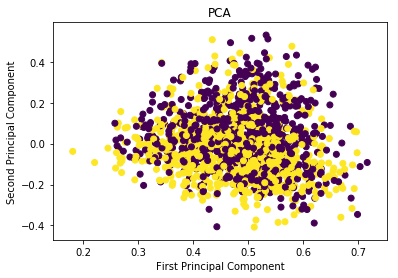

In [25]:
pca = TruncatedSVD(n_components=2).fit_transform(Xtrain)

plt.scatter(pca[:, 0], pca[:, 1], c = y_train)
plt.title("PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

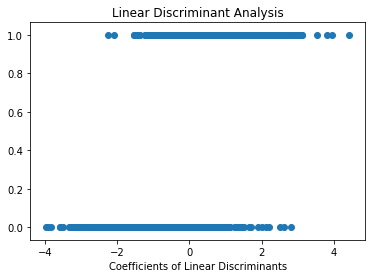

In [26]:
lda = LDA().fit(Xtrain, y_train).transform(Xtrain)

plt.scatter(lda, y_train)
plt.title("Linear Discriminant Analysis")
plt.xlabel("Coefficients of Linear Discriminants")
plt.show()

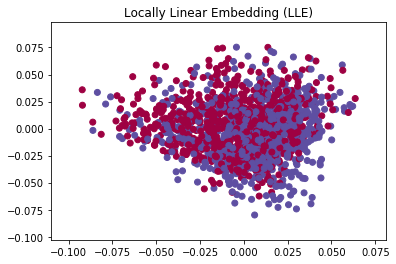

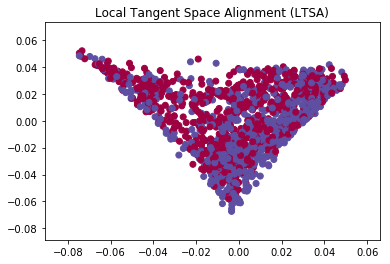

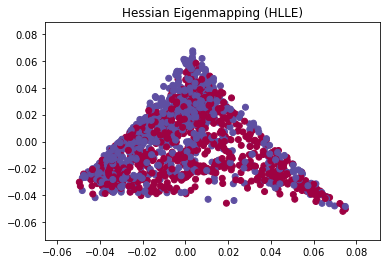

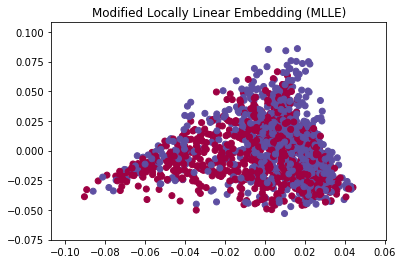

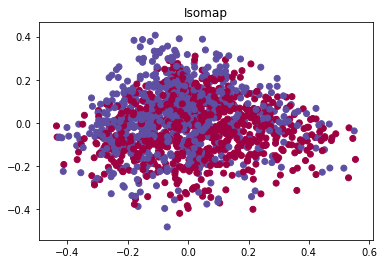

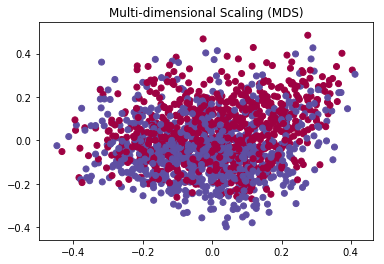

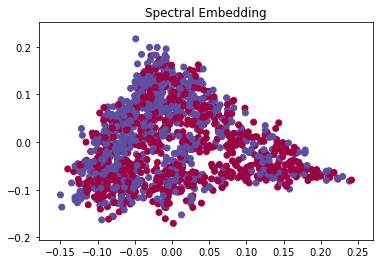

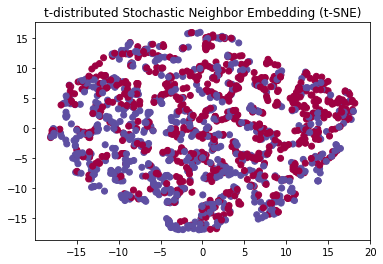

In [27]:
pca = TruncatedSVD(n_components=3).fit_transform(Xtrain)

n_neighbors = 10
n_components = 2

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['Locally Linear Embedding (LLE)', 'Local Tangent Space Alignment (LTSA)', 
          'Hessian Eigenmapping (HLLE)', 'Modified Locally Linear Embedding (MLLE)']

for i, method in enumerate(methods):
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver = 'auto', 
                                        method = method).fit_transform(pca)
    plt.scatter(Y[:, 0], Y[:, 1], c = y_train, cmap = plt.cm.Spectral)
    plt.title(labels[i])
    plt.show()
    
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(pca)
plt.scatter(Y[:, 0], Y[:, 1], c = y_train, cmap = plt.cm.Spectral)
plt.title("Isomap")
plt.show()

mds = manifold.MDS(n_components, max_iter = 100, n_init = 1)
Y = mds.fit_transform(pca)
plt.scatter(Y[:, 0], Y[:, 1], c = y_train, cmap = plt.cm.Spectral)
plt.title("Multi-dimensional Scaling (MDS)")
plt.show()

se = manifold.SpectralEmbedding(n_components = n_components, n_neighbors = n_neighbors)
Y = se.fit_transform(pca)
plt.scatter(Y[:, 0], Y[:, 1], c = y_train, cmap = plt.cm.Spectral)
plt.title("Spectral Embedding")
plt.show()

tsne = manifold.TSNE(n_components = n_components, init = 'pca', random_state = 0)
Y = tsne.fit_transform(pca)
plt.scatter(Y[:, 0], Y[:, 1], c = y_train, cmap = plt.cm.Spectral)
plt.title("t-distributed Stochastic Neighbor Embedding (t-SNE)")
plt.show()

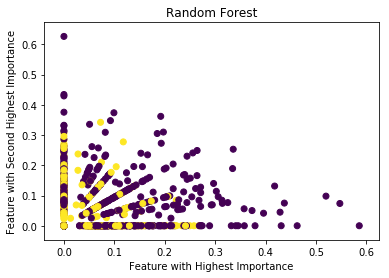

In [44]:
forest = RandomForestClassifier(n_estimators = 100).fit(Xtrain, y_train)
importance = forest.feature_importances_
second, first = sorted(range(len(importance)), key = lambda i: importance[i])[-2:]

plt.scatter(Xtrain[:, first], Xtrain[:, second], c = y_train)
plt.title("Random Forest")
plt.xlabel("Feature with Highest Importance")
plt.ylabel("Feature with Second Highest Importance")
plt.show()

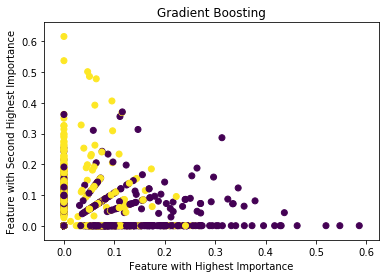

In [57]:
grad_boost = GradientBoostingClassifier(n_estimators = 500).fit(Xtrain, y_train)
importance = grad_boost.feature_importances_
second, first = sorted(range(len(importance)), key = lambda i: importance[i])[-2:]

plt.scatter(Xtrain[:, first], Xtrain[:, second], c = y_train)
plt.title("Gradient Boosting")
plt.xlabel("Feature with Highest Importance")
plt.ylabel("Feature with Second Highest Importance")
plt.show()

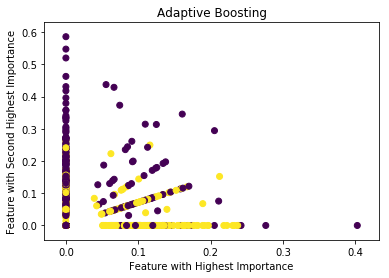

In [58]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.5).fit(Xtrain, y_train)
importance = ada_boost.feature_importances_
second, first = sorted(range(len(importance)), key = lambda i: importance[i])[-2:]

plt.scatter(Xtrain[:, first], Xtrain[:, second], c = y_train)
plt.title("Adaptive Boosting")
plt.xlabel("Feature with Highest Importance")
plt.ylabel("Feature with Second Highest Importance")
plt.show()

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **